In [1]:
import pandas as pd
df = pd.read_csv('data/text_emotion.csv')

In [2]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [3]:
col = ['tweet_id','sentiment', 'content']
df = df[col]
#  filters out rows where the 'content' column has NaN (Not a Number) values
df = df[pd.notnull(df['content'])]
# df = df.head(10)
category_to_id ={'empty': 0, 'sadness': 1, 'enthusiasm': 2, 'neutral': 3, 'worry': 4, 'surprise': 5, 'love': 6, 'fun': 7, 'hate': 8, 'happiness': 9, 'boredom': 10, 'relief': 11, 'anger': 12}
# df.columns = ['tweet_id','sentiment', 'content']
df['category_id'] = df['sentiment'].replace(category_to_id)
df.head(10)

,tweet_id,sentiment,content,category_id
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,0
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,1
2,1956967696,sadness,Funeral ceremony...gloomy friday...,1
3,1956967789,enthusiasm,wants to hang out with friends SOON!,2
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,3
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,4
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",1
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down,4
8,1956969035,sadness,@charviray Charlene my love. I miss you,1
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?,1


In [4]:
category_id_df = df[['sentiment', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df.head(30)

,sentiment,category_id
0,empty,0
1,sadness,1
3,enthusiasm,2
4,neutral,3
5,worry,4
14,surprise,5
16,love,6
21,fun,7
30,hate,8
40,happiness,9


In [5]:
category_to_id = dict(category_id_df.values)
print(category_to_id)
id_to_category = dict(category_id_df[['category_id', 'sentiment']].values)
print(id_to_category)

{'empty': 0, 'sadness': 1, 'enthusiasm': 2, 'neutral': 3, 'worry': 4, 'surprise': 5, 'love': 6, 'fun': 7, 'hate': 8, 'happiness': 9, 'boredom': 10, 'relief': 11, 'anger': 12}
{0: 'empty', 1: 'sadness', 2: 'enthusiasm', 3: 'neutral', 4: 'worry', 5: 'surprise', 6: 'love', 7: 'fun', 8: 'hate', 9: 'happiness', 10: 'boredom', 11: 'relief', 12: 'anger'}


In [6]:
# df.groupby('sentiment').content.count()
# df.groupby('sentiment').size()
# df['sentiment'].value_counts()

<Axes: xlabel='sentiment'>

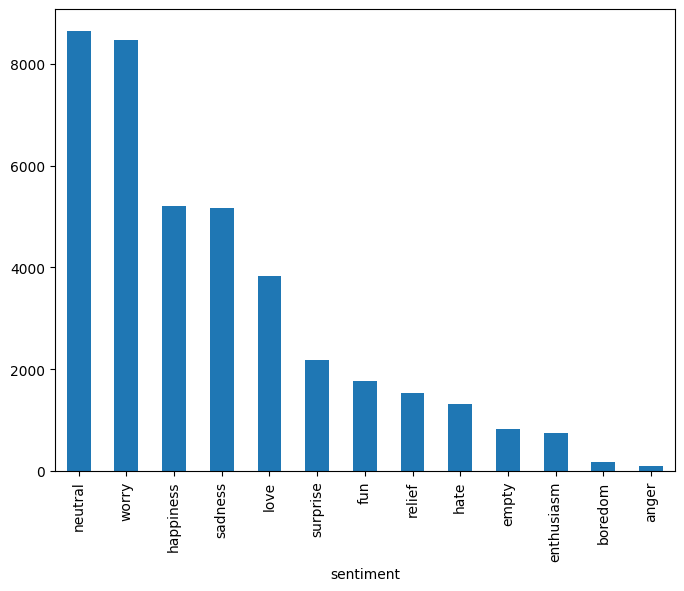

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
# count = df.groupby('sentiment').content.count()
# print(count)
# df.groupby('sentiment').content.count().plot.bar(ylim=0)
df['sentiment'].value_counts().plot.bar(ylim=0)
# plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.content).toarray()
print(features)
labels = df.category_id
print(labels)
print(features.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0        0
1        1
2        1
3        2
4        3
        ..
39995    3
39996    6
39997    6
39998    9
39999    6
Name: category_id, Length: 40000, dtype: int64
(40000, 8455)
